# データ読み込み

- ファイルの確認
- ライブラリの読み込み
- データの読み込み
- 構造の把握
- 長さの把握
- 欠損の確認

In [1]:
!ls

beginner2.ipynb  sub2.csv  submit.csv	      重回帰分析template.ipynb
beginner.ipynb	 sub3.csv  submit_sample.csv
lightgbm.ipynb	 sub4.csv  test.csv
sub1.csv	 sub5.csv  train.csv


In [2]:
# データ操作系
import pandas as pd
import numpy as np
import collections
# グラフ描画系
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# 前処理
import sklearn.preprocessing as sp
# データ分割
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
# 機械学習モデル
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.svm import LinearSVC # SVM
import lightgbm as lgb #LightGBM
# チューニング
from sklearn import metrics
import optuna
# 制御系
import warnings
warnings.simplefilter('ignore')
import gc


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv")

In [4]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [5]:
sample.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
print(len(train))
print(len(test))
print(len(sample))

27100
18050
18049


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# データの結合

- 同時に処理するため一時的にtrainとtestを結合する
- 長さの検算
- 欠損の検算

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
print(len(train), len(test), len(data))

27100 18050 45150


In [11]:
data.isnull().sum()

id               0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y            18050
dtype: int64

# 特徴量エンジニアリング

In [12]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [13]:
train.describe(include= 'O' )

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


## age

## balance

## day

## duration

## campaign

## pdays

## previous

## job

## material

## education

## default

## housing

## loan

## contact

## month

## poutcome

## カテゴリー変数

In [14]:
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
for i in categorical_features:
    label_encoder = sp.LabelEncoder()
    label_encoder.fit(data[i])
    label_encoder.transform(data[i])
    data[i]=label_encoder.transform(data[i])

## 整形完了後

In [15]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0.0
1,1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1.0
2,2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0.0
3,3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0
4,4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0.0


# 相関の確認

In [16]:
data.corr()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,1.000000,0.006042,0.006986,-0.008836,-0.004599,0.008952,0.001891,0.003951,0.010476,-0.011158,-0.001089,-0.002621,-0.004184,-0.002797,0.000338,-0.004696,-0.007088,0.002318
age,0.006042,1.000000,0.048086,-0.209372,-0.053898,-0.003564,0.000678,-0.285335,-0.044623,-0.054893,-0.064515,-0.129942,-0.057669,0.033344,0.004698,0.037856,-0.002386,0.086668
job,0.006986,0.048086,1.000000,0.028342,0.171798,0.001599,0.006206,-0.066930,0.012703,-0.046596,0.018764,-0.041526,-0.009833,-0.008934,-0.005991,0.002402,-0.018052,-0.000511
marital,-0.008836,-0.209372,0.028342,1.000000,0.168923,-0.007550,-0.001651,-0.036154,-0.014937,-0.021453,-0.006567,-0.022269,-0.026807,-0.037668,-0.001891,0.030155,-0.050204,0.081587
education,-0.004599,-0.053898,0.171798,0.168923,1.000000,-0.005068,0.001845,-0.082079,-0.055173,-0.069556,0.000948,-0.043812,-0.023502,-0.011010,0.001931,0.028109,-0.045916,0.075080
default,0.008952,-0.003564,0.001599,-0.007550,-0.005068,1.000000,0.001155,-0.002895,0.004562,-0.003940,-0.009330,-0.003705,-0.004591,-0.010390,0.003120,-0.004179,0.005681,-0.005586
balance,0.001891,0.000678,0.006206,-0.001651,0.001845,0.001155,1.000000,0.005037,-0.008646,0.000181,0.001772,0.004438,0.000807,-0.004737,-0.001370,0.005881,-0.009723,-0.000899
housing,0.003951,-0.285335,-0.066930,-0.036154,-0.082079,-0.002895,0.005037,1.000000,0.009817,0.118939,0.131649,0.320652,0.183220,-0.103906,0.003761,-0.040770,-0.047447,-0.164710
loan,0.010476,-0.044623,0.012703,-0.014937,-0.055173,0.004562,-0.008646,0.009817,1.000000,0.039239,-0.094751,-0.043638,-0.068805,0.103973,-0.005237,-0.051736,0.065985,-0.062696
contact,-0.011158,-0.054893,-0.046596,-0.021453,-0.069556,-0.003940,0.000181,0.118939,0.039239,1.000000,-0.094050,0.278705,0.034556,-0.051145,0.001320,-0.124929,0.208653,-0.083513


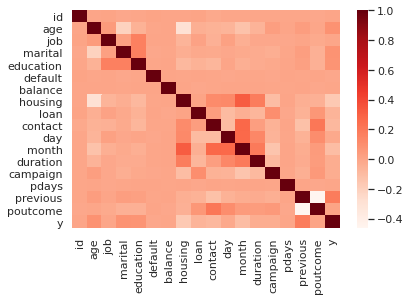

In [17]:
sns.heatmap(data.corr(),cmap="Reds")

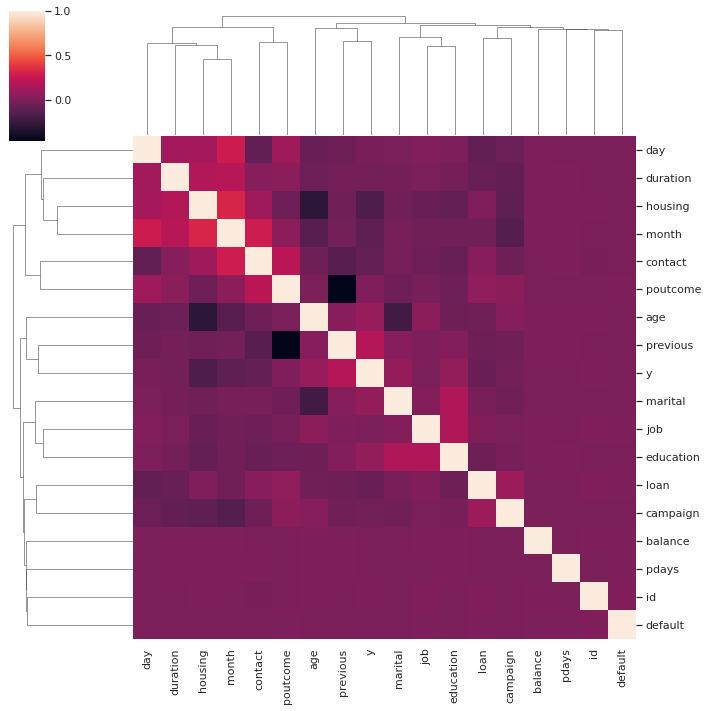

In [18]:
sns.clustermap(data.corr())

# 採用するカラムの決定

In [19]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
adopt_columns = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y']
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
adopt_data = data[adopt_columns]
adopt_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0.0
1,1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1.0
2,2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0.0
3,3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0
4,4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0.0


In [21]:
# 標準化？
#scale = sp.StandardScaler()
#scale.fit(adopt_data)

#X_train = scale.transform(adopt_data)

## データをtrainとtestに戻す

In [22]:
train = adopt_data[:len(train)]
test = adopt_data[len(train):]

## データを分割する

In [23]:
y_train = train['y']
X_train = train.drop('y', axis=1)
X_test = test.drop('y', axis=1)

### LightGBT

In [24]:
def get_evaluate(y_test, predict):

    fpr, tpr, thr_arr = metrics.roc_curve(y_test, predict)

    accuracy = metrics.auc(fpr, tpr)
    #recall = metrics.recall_score(y_test, predict)      

    return accuracy

In [25]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

auc_list = []
precision_list = []
recall_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_tr = X_train.iloc[train_index]
    y_tr = y_train.iloc[train_index]
    X_va = X_train.iloc[test_index]
    y_va = y_train.iloc[test_index]
    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)

    params = {
        'objective': 'binary'
    }

    clf = lgb.train(params, lgb_train)

    y_predict = clf.predict(X_va, num_iteration=clf.best_iteration)
    auc= get_evaluate(y_va, y_predict)
    print('AUC:{}'.format(auc))

    auc_list.append(auc)
print('Kfold平均 AUC:{}'.format(np.mean(auc_list)))

AUC:0.8517000281347169
AUC:0.8462665109555616
AUC:0.8329041879496097
AUC:0.8412886670450301
Kfold平均 AUC:0.8430398485212296


In [26]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

clf = lgb.train(params, lgb_train)

In [27]:
y_predict = clf.predict(X_test, num_iteration=clf.best_iteration)

In [28]:
light_pred = y_predict

# 提出準備

In [29]:
test["y"] = light_pred

In [30]:
test["y"].value_counts()

0.001995    13
0.002339    12
0.002083    12
0.002265    11
0.002061    11
            ..
0.261188     1
0.070379     1
0.004188     1
0.003652     1
0.074642     1
Name: y, Length: 17603, dtype: int64

In [31]:
test["y"].to_csv("sub5.csv", index=True, header=False)

In [32]:
!ls

beginner2.ipynb  sub2.csv  submit.csv	      重回帰分析template.ipynb
beginner.ipynb	 sub3.csv  submit_sample.csv
lightgbm.ipynb	 sub4.csv  test.csv
sub1.csv	 sub5.csv  train.csv


In [33]:
!cat sub5.csv

0,0.7819054625843787
1,0.0795693927030844
2,0.027338850820649383
3,0.002712214381464803
4,0.06709850887559442
5,0.006221225921534832
6,0.008354053460125256
7,0.219952307262921
8,0.03039657600461807
9,0.017359398650443607
10,0.002384905110710088
11,0.06826652065057852
12,0.008879383986667223
13,0.09166165271563745
14,0.028904853501062987
15,0.01200317112869592
16,0.10338482349090602
17,0.00442036856931547
18,0.06859869159215126
19,0.07060625190479847
20,0.1812938955912106
21,0.10425728507000702
22,0.017035274873909694
23,0.004066228573987072
24,0.06572371123796952
25,0.46591147666370286
26,0.0753310620833662
27,0.0020481171536382257
28,0.020337453669025424
29,0.005738868310764994
30,0.0023113533303211406
31,0.0017966255492709697
32,0.021680851536222602
33,0.005827548409132175
34,0.14437108679800018
35,0.03458216471333721
36,0.00845690150244556
37,0.019073219928178124
38,0.05835033328902267
39,0.11266197241734877
40,0.02274486142833105
41,0.0621691754288077
42,0.01097243974242909
43,0.01

1721,0.3055736795966975
1722,0.02688741420965098
1723,0.1774014633031814
1724,0.04603092190714065
1725,0.0658792243546309
1726,0.1046846167601216
1727,0.2796246467228808
1728,0.08427271749078671
1729,0.02132720033310112
1730,0.03347221478654778
1731,0.04497221443876853
1732,0.019942089142371822
1733,0.019364317854724433
1734,0.049474074727667745
1735,0.010763486391563337
1736,0.004364349479875352
1737,0.1439736108365747
1738,0.020706597247931217
1739,0.027495732472320435
1740,0.016516244728087524
1741,0.001987116751783666
1742,0.00239781361139873
1743,0.018378391109686868
1744,0.05524299605478583
1745,0.11301849833571323
1746,0.02580934458186765
1747,0.8068156791661623
1748,0.07687964768351277
1749,0.07102368840498617
1750,0.0023689330488401933
1751,0.003791972071350061
1752,0.05495747099592506
1753,0.08064596518735812
1754,0.057195030090147946
1755,0.004510115928151482
1756,0.040181285754025166
1757,0.006057173141467868
1758,0.25564381688001325
1759,0.014129170733186537
1760,0.0177313

3280,0.002917594520159944
3281,0.10176135823675223
3282,0.004283836595112547
3283,0.10743987860710559
3284,0.06453554318359567
3285,0.02400192728112792
3286,0.013191645244081162
3287,0.0020447663458320804
3288,0.03683246343450156
3289,0.047306698768726285
3290,0.08196186211813339
3291,0.02285357178887927
3292,0.024483115697859822
3293,0.30071626333999685
3294,0.004301875167535743
3295,0.002652593028253433
3296,0.026109081071308746
3297,0.01426693927168803
3298,0.0016390635978161382
3299,0.018348609972226357
3300,0.03103031274335612
3301,0.020461040021698598
3302,0.02453025343971782
3303,0.04129086860936243
3304,0.05415093145024407
3305,0.24574583817465298
3306,0.1338109315624191
3307,0.011663607596749528
3308,0.05512035647165475
3309,0.004634337271061774
3310,0.0039238997761498785
3311,0.104083358298
3312,0.009922453413470178
3313,0.03376285696387013
3314,0.017179552166325066
3315,0.008909093462836727
3316,0.03305440566164288
3317,0.17054219619186012
3318,0.7423291617060099
3319,0.0023

4609,0.010334011462052395
4610,0.0524707747315774
4611,0.027785021908703477
4612,0.0032378339885175468
4613,0.06486542517495239
4614,0.1101442592379344
4615,0.009014096265203483
4616,0.024372292739757356
4617,0.0026224951608992595
4618,0.072706509727423
4619,0.04737672744702457
4620,0.0034083791264464644
4621,0.0077345913269085435
4622,0.01404063254512114
4623,0.035207818142718686
4624,0.01939504329738057
4625,0.5497660918977118
4626,0.005350030391825928
4627,0.005384317755816212
4628,0.24628943657977342
4629,0.08239736610655518
4630,0.05561900076575243
4631,0.0020769642450485038
4632,0.012224066296078329
4633,0.21189435264028075
4634,0.017290424909125263
4635,0.037999552141693003
4636,0.06362164880401355
4637,0.04592418869666224
4638,0.03679141287708384
4639,0.0031596321539145355
4640,0.01902129385292701
4641,0.27371871793573155
4642,0.12942573051658532
4643,0.11249407660193946
4644,0.069488822493437
4645,0.02279043538479056
4646,0.1209781829199943
4647,0.010999909228160888
4648,0.145

7169,0.03664914833064048
7170,0.002041574868758346
7171,0.03801529948976775
7172,0.041470378276985964
7173,0.004621755116093678
7174,0.02070201012215054
7175,0.08275619001986012
7176,0.005531313271463759
7177,0.07659216942395193
7178,0.004896884264699356
7179,0.0682809020502401
7180,0.00200816309278901
7181,0.04204616900289075
7182,0.02291383425783398
7183,0.05446695978282543
7184,0.023798215367776102
7185,0.022678077886261565
7186,0.061423603853771644
7187,0.0027554603425483364
7188,0.002528646905747587
7189,0.015782113499206656
7190,0.04831480695887867
7191,0.06813272899274914
7192,0.08493272843202418
7193,0.05404588236668544
7194,0.6526435885400004
7195,0.03802326424466281
7196,0.06420667422442747
7197,0.31918969975315675
7198,0.09678036583194773
7199,0.005625226983791808
7200,0.071792974523946
7201,0.009498002706986232
7202,0.01937793531932742
7203,0.01637575643612235
7204,0.002271348284095841
7205,0.0449133290622586
7206,0.014099062209889855
7207,0.052085628845210945
7208,0.287113

8078,0.02136546953172539
8079,0.014603191777041965
8080,0.04482188158228976
8081,0.006243866301114581
8082,0.2503423323801341
8083,0.03222722321690103
8084,0.012602724240407521
8085,0.040541654496536704
8086,0.018905728400723028
8087,0.032818688306711453
8088,0.0016655675113265399
8089,0.09379358577821868
8090,0.007540181051108407
8091,0.0957390780587351
8092,0.04659481827176283
8093,0.0045074740717123245
8094,0.10778064642512218
8095,0.00598499289734111
8096,0.14788954385826192
8097,0.05720394772806209
8098,0.0741619531349671
8099,0.02606530095189538
8100,0.24979040003166514
8101,0.026984743293470715
8102,0.224331574527453
8103,0.7805260320006684
8104,0.12727504903558548
8105,0.03726496732117198
8106,0.10810942230749554
8107,0.03139823472428898
8108,0.019608803884224785
8109,0.01155868260569991
8110,0.4908299587251159
8111,0.016086544843492385
8112,0.022175760571018655
8113,0.04868615873366624
8114,0.0026337941983624385
8115,0.0023207290576121096
8116,0.009260413647847713
8117,0.04438

8448,0.06462115343830288
8449,0.015940828139201363
8450,0.027764589435160233
8451,0.007986706886058662
8452,0.013617598342843209
8453,0.0236802077435188
8454,0.07128496472382559
8455,0.009185149618198937
8456,0.031178376045380887
8457,0.01741272069651822
8458,0.022624271040257844
8459,0.06106888281736397
8460,0.1303525866391264
8461,0.038470470746065834
8462,0.22567057502278876
8463,0.12418236100937521
8464,0.28285278166818306
8465,0.11789511374871371
8466,0.08555708623253144
8467,0.002598837663961371
8468,0.681547126838751
8469,0.038082347228367563
8470,0.03600432276986973
8471,0.007663386879735633
8472,0.016959252286383595
8473,0.026487613647731143
8474,0.00581706382059795
8475,0.027654655122042338
8476,0.011237314866684911
8477,0.049056474087410755
8478,0.002531952887468309
8479,0.07155456152198042
8480,0.015337242617333302
8481,0.010569353500670852
8482,0.061498554241780815
8483,0.006040934984215872
8484,0.14247900260955398
8485,0.020849052364254907
8486,0.007366743829780208
8487,0

9444,0.024420466541250116
9445,0.02772313540326044
9446,0.03621817662695462
9447,0.026673509206643884
9448,0.020025156256504906
9449,0.014351114513708923
9450,0.0024474025709787023
9451,0.00235741825095116
9452,0.01012380107328959
9453,0.06091321078031087
9454,0.23322557904828226
9455,0.017005097000273566
9456,0.01973172599715408
9457,0.14244709006819917
9458,0.0052402018165183945
9459,0.22638340698253917
9460,0.01527497661954058
9461,0.007371481558622812
9462,0.01732361278559473
9463,0.0020990448277579845
9464,0.0024734115895056873
9465,0.03421419626429097
9466,0.07448516706609196
9467,0.09560430653979123
9468,0.005507738171166573
9469,0.0485973318530839
9470,0.028001823464516
9471,0.026984989344693833
9472,0.364495675375027
9473,0.015455833386774863
9474,0.00487808893097199
9475,0.006429615992829727
9476,0.04480805969702714
9477,0.026849928594932952
9478,0.0575720052462243
9479,0.020187714285037704
9480,0.0026262114041450736
9481,0.0025032110630992008
9482,0.004837833867022491
9483,0

13110,0.07002316203405262
13111,0.1239504665096103
13112,0.1555722183896458
13113,0.126988053245527
13114,0.10862534687986955
13115,0.1296188144098838
13116,0.018333498595820716
13117,0.021480078567490745
13118,0.014321712838644566
13119,0.056279019333220506
13120,0.03971808967816695
13121,0.004854199733874272
13122,0.062113804311007416
13123,0.03411789729227966
13124,0.09696164190539701
13125,0.09091801594445395
13126,0.13772820294594712
13127,0.09144812286872255
13128,0.028324808079105455
13129,0.19946553968662797
13130,0.0018977185583008327
13131,0.02087095261864329
13132,0.05021021271294389
13133,0.035273475776071435
13134,0.05021005630848636
13135,0.17909967620345696
13136,0.018759470958915024
13137,0.0032272406235891627
13138,0.002183863553094611
13139,0.09540053205038745
13140,0.1568115762827399
13141,0.028772151514309553
13142,0.011068955296313668
13143,0.09193714899348077
13144,0.020372562774134857
13145,0.28116600312267576
13146,0.04843630067155239
13147,0.04211191545507347
1

15481,0.01736747162497111
15482,0.021947103524820998
15483,0.011585651371813001
15484,0.03065065162419194
15485,0.09063231675333491
15486,0.007688456727885128
15487,0.019893110450984682
15488,0.019930710854573545
15489,0.05438318040183588
15490,0.031534460668429805
15491,0.0023638704528596084
15492,0.002525796275783287
15493,0.12093796392438501
15494,0.20122424614425477
15495,0.030833559359977496
15496,0.0033543359101220077
15497,0.07812844151064167
15498,0.038011310053070006
15499,0.005105412413481028
15500,0.038890737901308
15501,0.04960338373776358
15502,0.15611894667109114
15503,0.2326732666723414
15504,0.2871515908955581
15505,0.13845589179549167
15506,0.15306699158365492
15507,0.0037707985281474157
15508,0.06615435110745865
15509,0.042999374319459084
15510,0.002159990104330003
15511,0.003210780758502698
15512,0.021873644335820164
15513,0.021821040858888918
15514,0.033987098114575544
15515,0.03822279523182458
15516,0.04919963626677757
15517,0.04574288629593475
15518,0.162598402078

16174,0.06115127598291201
16175,0.006931184061743804
16176,0.22309062788958461
16177,0.010620336910390315
16178,0.03296714578410984
16179,0.7395876021960248
16180,0.16505576493556226
16181,0.026753527458925935
16182,0.18703194317646066
16183,0.3080863928564453
16184,0.00478535564565448
16185,0.22863484449531254
16186,0.0020369286239623093
16187,0.0971247032466296
16188,0.37041717033096294
16189,0.021012207347017704
16190,0.02340402518657021
16191,0.02747489763503067
16192,0.0433258479525559
16193,0.007993869170401588
16194,0.059319520213124984
16195,0.0037880384949201757
16196,0.40394241290618194
16197,0.015575849484800465
16198,0.03594161363044199
16199,0.003092933647855093
16200,0.003929090486019526
16201,0.06527542566344414
16202,0.07492916231214578
16203,0.03649662876954065
16204,0.0023894862435262535
16205,0.02448173793100724
16206,0.04882023220819253
16207,0.035752194269649096
16208,0.22167788753217663
16209,0.035175273245666425
16210,0.05433672705009039
16211,0.05653005564076948

17535,0.24679033554815974
17536,0.1700601931381012
17537,0.15604786709737722
17538,0.021049853556025715
17539,0.002252673913045111
17540,0.19816450383469217
17541,0.0017835031099047883
17542,0.005846176837812571
17543,0.0018585438648503368
17544,0.03776099512006345
17545,0.04319627914311797
17546,0.002177500369109745
17547,0.022663447263100846
17548,0.02228864923299881
17549,0.16805946540614197
17550,0.04563273445310299
17551,0.22767877792763594
17552,0.0203258702937472
17553,0.03991768295918782
17554,0.05898719605106019
17555,0.002245428150750018
17556,0.0037880384949201757
17557,0.2745098209126852
17558,0.035426458055995105
17559,0.0048634300612878
17560,0.0826843082486723
17561,0.04254071765877415
17562,0.003496828898272589
17563,0.03860020515306614
17564,0.016081145128130515
17565,0.026059214227121433
17566,0.01696681218791083
17567,0.02457696712541376
17568,0.23528790609610598
17569,0.17076544095461307
17570,0.023742675102079593
17571,0.00547856069180405
17572,0.015920752888829003